In [67]:
import numpy as np
import matplotlib.pyplot as pl
import matplotlib as mpl
import math
import seaborn as sns
from scipy import stats
from astropy import constants as const
import csv
from scipy import constants
from scipy.integrate import odeint
from tqdm import tqdm
from scipy import integrate
from scipy.integrate import quad, dblquad
from astropy.cosmology import Planck18 as cosmo# WMAP9 as cosmo #
import astropy.units as u
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sympy import *
from sympy import simplify
import pandas as pd
import os
import errno
from itertools import combinations, permutations
import scipy.integrate as spi


In [68]:
H0 = cosmo.H(0)
G = const.G
c = const.c

In [69]:
M = 1e7 * u.M_sun
R = 1.*u.parsec
rho_DM = 0.2*u.M_sun/(u.pc**3)
m_i = 10.*u.M_sun
m_j = 10.*u.M_sun

if m_i==m_j:
    N_i = M/(2*m_i)
    N_j = M/(2*m_j)
    R_s_i = (2 * G * m_i) / c**2
    R_s_j = (2 * G * m_j) / c**2 
    R_min =  R_s_i + R_s_j

M_i = (N_i*m_i)
M_j = (N_j*m_j)
    
print("Cluster Propierities\n")
print("M =\t", M)
print("R =\t", R)
print("m_i =\t", m_i, "\t\t N_i =\t", round(float(N_i)))
print("m_j =\t", m_j, "\t\t N_j =\t", round(float(N_j)))
print("M_t = ", (M_i + M_j))
print("\t\t\t\t N_total =\t",round(float(N_i + N_j)))
#print("v_rel =\t", "{:.2f}".format(v_rel.to(u.km* u.s**(-1))))

Cluster Propierities

M =	 10000000.0 solMass
R =	 1.0 pc
m_i =	 10.0 solMass 		 N_i =	 500000
m_j =	 10.0 solMass 		 N_j =	 500000
M_t =  10000000.0 solMass
				 N_total =	 1000000


In [70]:
def f_i(E_i): ## eq. 19 shapiro
    return (24. * (2.)**(1./2.) * N_i * R**2. * E_i**(7./2.))/(7*(math.pi**(3.))*(G**5.)*(M**5.))

def f_j(E_j):
    return (24. * (2.)**(1./2.) * N_j * R**2. * E_j**(7./2.))/(7*(math.pi**(3.))*(G**5.)*(M**5.))

def rho_i(r):## eq. 20
    return ((3*M_i)/(4*(math.pi)*(R**(3.))))*((1 + r**(2.)/R**(2.))**(-5./2.))

def rho_j(r):
    return ((3*M_j)/(4*(math.pi)*(R**(3.))))*((1 + r**(2.)/R**(2.))**(-5./2.))

def phi(r):## eq. 21
    return (G*M/R)*((1 + r**(2.)/R**(2.))**(-1./2.))

In [71]:
def n_i_1(r):
    return (rho_i(r)/m_i)

def n_j_1(r):
    return (rho_j(r)/m_j)

In [72]:
alfa = ((4*24*(2**(1/2))*(R**(2.)))/(math.pi*(G**(5.))*(M**(5.))*(2**(17./2.))))

def vel_i(r):
    return (alfa**(1./2.))*(N_i**(1./2.))*((phi(r)**(3))/(n_i_1(r)**(1./2.)))

def vel_j(r):
    return (alfa**(1./2.))*(N_j**(1./2.))*((phi(r)**(3))/(n_j_1(r)**(1./2.)))

In [73]:
def GAMMA(r1,r0):
    a=(r1**(2.)/((R.value)**(2.)))
    b=(r0**(2.)/(R**(2.)))
    return (r1**(2.))*((1.+(a))**(-9./4.))*(1./((1. + b)**(1./4.)) + 1./((1. + a)**(1./4.)))**(3./7.) - abs((1./((1. + b)**(1./4.)) - 1./((1. + a)**(1./4.))))**(3./7.)

In [74]:
sigma = 2*math.pi*(85*math.pi/(6*math.sqrt(2)))**(2./7.) * (G**(2.) * (m_i+m_j)**(10./7.) * m_i**(2./7.) * m_j**(2./7.))/(c**(10./7.))
sigma = sigma.to(u.m**(32./7)/u.s**(18./7.))#.to(u.parsec**2)
#print(sigma)

In [75]:
betha = (3./(4*math.pi*(R**(3.))))
etha = (G*M/R)

In [76]:
interval = 0.1
r = np.arange(.1, R.value+interval, interval)

In [77]:
print("Primordial Black holes Masses:\t", "m_i = ",m_i,"\t m_j = ", m_j, "\n")
print("radius \t merger_rate \t\t\t Number_Mergers at Universe's time \t Time to the first Merger\n")

colm1 = []
colm2 = []
colm3 = []
colm4 = []

for h in r:
    r0 = h*u.parsec
    colm1.append("%.2f"%r0.value)
    I, err = quad(GAMMA, h+interval, 0., args=(r0,))
    ctes = (14*math.pi/3.)*sigma*(N_i)*(n_j_1(r0)/vel_j(r0))*(alfa**(-2./7.))*(betha**(9./7.))*(etha**(-12./7.))
    merger = (I*ctes*(u.parsec**(3.))).to(u.yr**(-1))
    colm2.append(merger.value)
    colm3.append((merger*(cosmo.age(0).to(u.yr))).value)
    colm4.append(((merger**(-1.)).to(u.Gyr)).value)
    print("%.2f"%r0.value,"\t",merger,"\t\t", merger*(cosmo.age(0).to(u.yr)),"\t\t",(merger**(-1.)).to(u.Gyr))#/(cosmo.age(0).to(u.yr)))


Primordial Black holes Masses:	 m_i =  10.0 solMass 	 m_j =  10.0 solMass 

radius 	 merger_rate 			 Number_Mergers at Universe's time 	 Time to the first Merger

0.10 	 1.1143434547163082e-09 1 / yr 		 15.36332539721899 		 0.897389396211406 Gyr
0.20 	 2.0797731991178226e-09 1 / yr 		 28.67359455043122 		 0.48082165902713336 Gyr
0.30 	 3.002318199544929e-09 1 / yr 		 41.39261665726223 		 0.3330759544912905 Gyr
0.40 	 3.7011387961942577e-09 1 / yr 		 51.02717606994852 		 0.2701871113367223 Gyr
0.50 	 4.131557990152615e-09 1 / yr 		 56.96131612883586 		 0.242039444292796 Gyr
0.60 	 4.326973344534613e-09 1 / yr 		 59.65548520595204 		 0.23110842623125866 Gyr
0.70 	 4.345352792018542e-09 1 / yr 		 59.90888054032728 		 0.2301309117724067 Gyr
0.80 	 4.241122545281193e-09 1 / yr 		 58.47187008355928 		 0.2357866317993173 Gyr
0.90 	 4.056747343007816e-09 1 / yr 		 55.9299103172814 		 0.2465029037915299 Gyr
1.00 	 3.823256684475184e-09 1 / yr 		 52.71080138900129 		 0.26155711806131826 Gyr


In [78]:
for i in colm4:
    if (i/10)<cosmo.age(0).value:
        delta_t_1 = (np.amin(colm4))*u.Gyr
        delta_t_1 = round((delta_t_1/10.).to(u.yr).value)
    else:
        delta_t_1 = (10e9)
        #print("To get mergers we need age of universe, the system going to use")
        #print("{:.2e}".format(delta_t_1))
            
print("Minimum time to get 1st Generation: \n T_merger = ","{:.2e}".format(delta_t_1)*u.yr)

Minimum time to get 1st Generation: 
 T_merger =  2.3e+07 yr


In [79]:
number_col_array = []
prob_array = []

print("Primordial Black Holes Masses:\t", f"m_i = {m_i}", f"m_j = {m_j}\n")
print(f"{'Merger Rate (1/yr)':<19} | {'Probability':<15} | {'Collision Number':<25}")
print("=" * 70)

def integrand_n_i(r1):
    a = (r1**2 / (R.value**2))
    return (r1**2) * ((1 + a)**(-5./2.))

def integrand_n_j(r0):
    b = (r0**2 / (R.value**2))
    return (r0**2) * ((1 + b)**(-5./2.))

for h, i in zip(colm2, r): #    colm2.append(merger.value)
    GAMMA_value = h * (1 / u.yr)
    Prob = GAMMA_value * (delta_t_1 * u.yr)  # Integration dt
    prob_array.append(Prob)

    I, err = quad(integrand_n_j, 0, i + interval)
    N_j_r = 3 * N_j * (R**-3) * I * u.parsec**3
    Num_Col = N_j_r * Prob  # Número de choques
    number_col_array.append(Num_Col)

    # Imprimir cada fila con alineación fija
    print(f"{GAMMA_value:<12.3e} |\t {Prob:<12e} | {Num_Col:<25.3e}")


Primordial Black Holes Masses:	 m_i = 10.0 solMass m_j = 10.0 solMass

Merger Rate (1/yr)  | Probability     | Collision Number         
1.114e-09    1 / yr |	 2.564449e-02 | 9.672e+01                
2.080e-09    1 / yr |	 4.786201e-02 | 5.678e+02                
3.002e-09    1 / yr |	 6.909262e-02 | 1.770e+03                
3.701e-09    1 / yr |	 8.517464e-02 | 3.809e+03                
4.132e-09    1 / yr |	 9.507992e-02 | 6.474e+03                
4.327e-09    1 / yr |	 9.957703e-02 | 9.390e+03                
4.345e-09    1 / yr |	 1.000000e-01 | 1.219e+04                
4.241e-09    1 / yr |	 9.760134e-02 | 1.461e+04                
4.057e-09    1 / yr |	 9.335830e-02 | 1.650e+04                
3.823e-09    1 / yr |	 8.798495e-02 | 1.782e+04                


Energía radiada en GW: 2.234e+47 J
Masa final del agujero negro fusionado: 18.750005 solMass
3.981288735296757e+51 J
2.1605266027948032e+49 J


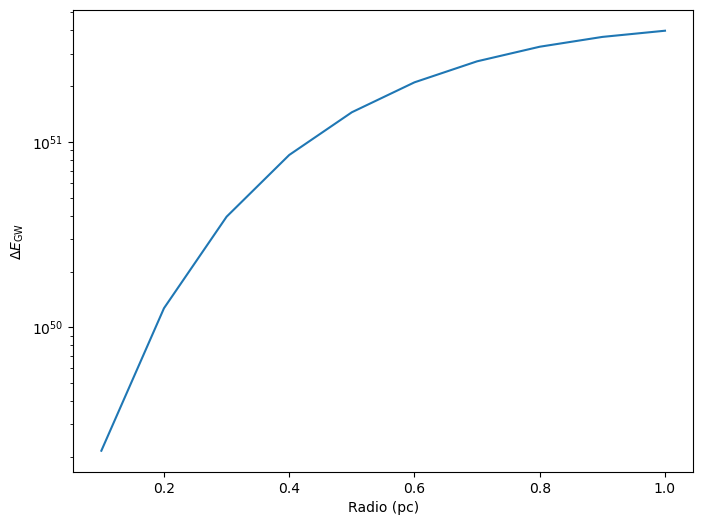

In [101]:
#Definir el radio de Schwarzschild con Astropy
def R_Schwarzschild(M):
    """ Calcula el radio de Schwarzschild de un agujero negro con masa M """
    return (2 * G * M) / c**2

# Definir la energía total radiada en ondas gravitacionales con unidades de Astropy
def E_rad_GW(m1, m2, a0, a1):
    """ Calcula la energía total radiada en ondas gravitacionales desde a0 hasta a1 """
    
    # Convertir a unidades SI para la integración
    G_SI = G.to(u.m**3 / (u.kg * u.s**2)).value  # Convertir G a unidades sin astropy para quad
    m1_SI = m1.to(u.kg).value
    m2_SI = m2.to(u.kg).value
    a0_SI = a0.to(u.m).value
    a1_SI = a1.to(u.m).value

    # Realizar la integración numérica sin unidades y restaurar al final
    integral, _ = spi.quad(lambda a: (m1_SI * m2_SI * G_SI / (2 * a**2)), a0_SI, a1_SI)
    
    return (integral * u.J)  # Restaurar unidades de energía en Joules

# Definir la masa final del agujero negro fusionado
def final_mass_GW(m1, m2, a0, a1):
    """ Calcula la masa final del agujero negro fusionado después de la emisión de GW """
    E_rad = E_rad_GW(m1, m2, a0, a1)  # Energía radiada en GW
    return (m1 + m2) - (E_rad / c**2)  # Corrección de masa con unidades de astropy

# Definir parámetros iniciales con unidades de Astropy
m_i = (10 * u.Msun)  # Masa del primer PBH
m_j = (10 * u.Msun)  # Masa del segundo PBH

a1_AU = 0.1 * u.AU  # Separación final en AU
a0 = R_Schwarzschild(m_i) + R_Schwarzschild(m_j)  # Separación inicial mínima antes de la fusión

# Calcular la energía radiada y la nueva masa fusionada
energy_radiated = E_rad_GW(m_i, m_j, a0, a1_AU)
final_mass = final_mass_GW(m_i, m_j, a0, a1_AU)

# Mostrar los resultados con unidades de Astropy
print(f"Energía radiada en GW: {energy_radiated:.3e}")
print(f"Masa final del agujero negro fusionado: {final_mass:f}")

energy_total_GW_shell = number_col_array * energy_radiated  # Usamos la misma E_rad en cada colisión

print(np.max(energy_total_GW_shell))
print(np.min(energy_total_GW_shell))


pl.figure(figsize=(8, 6))
pl.plot(r, energy_total_GW_shell)
pl.xlabel("Radio (pc)")
pl.ylabel(r'$\Delta E_{\rm GW}$')
pl.yscale('log')